# Teste de Hipóteses II 

Nesse notebook veremos:

1. Teste de Hipóteses Simples 
2. Hipótese Alternativa Bilateral 
3. Teste T

## Teste de Hipótese Simples

O objetivo é considerar se um vetor de observações vem de uma entre duas observações. Nesse caso o espaço $\Omega$ é formado por dois pontos, e não é um espaço de parâmetros, mas espaço de distribuições, em particular dessas duas distribuições. 

Isto é, vamos assumir que $X = (X_1, ..., X_n)$ vem de $f_0(x)$ ou $f_1(x)$. Assim $\Omega = \{\theta_0, \theta_1\}$ e $\theta = \theta_i$ se os dados tem distribuição $f_i(x), i = 0,1$. 

Vamos denotar:

$
\alpha(\delta) = P(\text{Rejeitar} H_0|\theta = \theta_0) = P(\text{Erro I})
$

$
\beta(\delta) = P(\text{Não rejeitar} H_0|\theta = \theta_1) = P(\text{Erro II})
$

### Teorema 

Seja $\delta^*$ o procedimento de teste que não rejeita $H_0$ se $af_0(x) > bf_1(x)$ e rejeita se $af_0(x) < bf_1(x)$. Então, para todo outro procedimento de teste $\delta$, 
$$
a\alpha(\delta^*) + b\beta(\delta^*) \le a\alpha(\delta) + b\beta(\delta) 
$$

Queremos escolher um teste que minimize essa combinação linear $a\alpha(\delta) + b\beta(\delta)$. Claro que seria ótimo ter esse erro zerado, mas sabemos que existe uma espécie de *trade off* entre esses erros. Esse teorema dá o teste necessário para que isso acontença. 

### Corolário

Considere as hipóteses do teorema anterior, $a > 0$ e $b > 0$. Defina estatística de teste **razão de verossimilhança**:
$$
\Lambda(x) = \begin{cases}
              \frac{f_0(x)}{f_1(x)}, \text{ se } f_0(x) \le f_1(x) \\
              1, \text{ caso contrário }. 
\end{cases}
$$
Defina o procedimento de teste $\delta$: Rejeita $H_0$ se $\Lambda(x) > a/b$. Então o valor de $af_0(x) + bf_1(x)$ é mínimo.  

### Lema Nayman-Pearson

Suponha que $\delta '$ tem a seguinte forma, para algum $k > 0$: $H_0$ não é rejeitada se $f_1(x) < kf_0(x)$ e o é quando $f_1(x) > kf_0(x).$ Se $\delta$ é outro procedimento de teste tal que $\alpha(\delta) \le \alpha(\delta ')$, então $\beta(\delta) \ge \beta(\delta ').$

### Implementação 

Vamos fazer uma simples implementação de uso para esse tipo de problema. 

In [1]:
import numpy as np 
from scipy.stats import bernoulli, binom

Nesse caso, vamos fazer uma simples simulação, onde um parâmetro de uma distribuição de Bernoulli pode ser $p = 0.4$ ou $p = 0.6$. Vamos gerar essa amostra, mas sem de fato conhecer $p$ verdadeiro.

In [2]:
ro = np.random.RandomState(1000000) #random state 
p = ro.choice([0.4, 0.6])

Teremos uma amostra de tamanho $n$.

In [3]:
n = 20
X = ro.binomial(1, p, size = n)

Vamos utilizar o Lema Nayman-Pearson. O objetivo é testar as seguintes hipóteses: 

$$
H_0: p = 0.4
$$
$$
H_1: p = 0.6
$$

Vamos fixar $\alpha_0 = 0.05$ o tamanho do teste. Temos que, se $y = \sum_{i=1}^n x_i \sim Binomial(n,p)$, 

$$
\frac{f_1(x)}{f_0(x)} = \frac{0.6^y0.4^{n-y}}{0.4^y0.6^{n-y}} = \left(\frac{3}{2}\right)^y\left(\frac{2}{3}\right)^{n-y} = \left(\frac{3}{2}\right)^{2y - n}
$$

Assim:

$$
\begin{split}
0.05 &= P(f_1(x) > kf_0(x)|p = 0.4) = P\left(\left(\frac{3}{2}\right)^{2y - n} > k\right) \\
&= P\left(2y - n > \frac{\log(k)}{\log(3/2)}\right)  \\
&= P\left(y > \frac{\log(k)}{2\log(3/2)} + \frac{n}{2}\right), y \sim Binomial(n,0.4)
\end{split}
$$

Isto é, preciso escolher $k$ que satisfaça essa relação. Vamos calcular $k$ numericamente utilizando um método de otimização. Como não queremos que seja marior do que 0.05, precisamos colocar peso para que não seja. Veja que existem vários valores de $k$ que satisfazem isso. 

In [4]:
alpha0 = 0.05 
Y = binom(n = n, p = 0.4)

func = lambda k, n: 0.95 - Y.cdf((1/2)*np.log(k)/np.log(3/2) + n/2)

In [5]:
print('Para k = {}, a diferença é {}'.format(2, func(2,n)))
print('Para k = {}, a diferença é {}'.format(3, func(3,n)))
print('Para k = {}, a diferença é {}'.format(4, func(4,n)))
print('Para k = {}, a diferença é {}'.format(5, func(5,n)))
print('Para k = {}, a diferença é {}'.format(6, func(6,n)))

Para k = 2, a diferença é 0.07752124614721656
Para k = 3, a diferença é 0.006526367034253022
Para k = 4, a diferença é 0.006526367034253022
Para k = 5, a diferença é 0.006526367034253022
Para k = 6, a diferença é -0.028971072522228858


Por esse motivo, vamos tomar $k=6$. Pela Lema de Neyman Pearson, esse teste é o que minimiza o Erro do Tipo II.  

In [6]:
k = 6

Vamos ver se rejeitamos ou não a hipótese nula baseado nos dados obtidos. 

In [7]:
f0 = lambda x: 0.4**(sum(x))*0.6**(len(x) - sum(x))
f1 = lambda x: 0.6**(sum(x))*0.4**(len(x) - sum(x))

if f1(X) > k*f0(X):
    print(r'Rejeitamos H0.')
else:
    print(r'Não rejeitamos H0.')

Não rejeitamos H0.


Vamos ver quem é $p$, então. 

In [8]:
print('O valor de p é .... ')
print(p)

O valor de p é .... 
0.4


Fizemos bem em não rejeitar a hipótese nula!

## Hipótese Alternativa Bilateral 

Seja $X = (X_1, ..., X_n)$ uma amostra aleatória de uma distribuição normal com média $\mu$ desconhecida e variância $\sigma^2$ conhecida e queremos testar a hipótese 
$$
H_0: \mu = \mu_0
$$
$$
H_1: \mu \neq \mu_0
$$

Como $\bar{X}_n$ é um estimador consistente de $\mu$, faz sentido rejeitar a hipótese nula quando a média amostral se afasta de $\mu_0$. Para isso, vamos escolher $c_1, c_2$ de forma que 

$
P(\bar{X}_n \leq c_1|\mu = \mu_0) + P(\bar{X}_n \geq c_2|\mu = \mu_0) = \alpha_0
$

$
\Rightarrow P\left(Z \leq \sqrt{n}\frac{c_1 - \mu_0}{\sigma}\right) + P\left(Z \geq \sqrt{n}\frac{c_2 - \mu_0}{\sigma}\right) = \alpha_0
$

$
\Rightarrow \Phi\left(\sqrt{n}\frac{c_1 - \mu_0}{\sigma}\right) + 1 -  \Phi\left(\sqrt{n}\frac{c_2 - \mu_0}{\sigma}\right) = \alpha_0 
$

$
\Rightarrow \Phi\left(\sqrt{n}\frac{c_1 - \mu_0}{\sigma}\right) = \alpha_1 \text{ e } \Phi\left(\sqrt{n}\frac{c_2 - \mu_0}{\sigma}\right) = 1 - \alpha_2, \text{ com } \alpha_1 + \alpha_2 = \alpha_0 
$

*Observação:* $\bar{X}_n \sim N(\mu, \sigma^2/n) \Rightarrow Z = \sqrt{n}\frac{\bar{X}_n - \mu}{\sigma} \sim N(0,1)$

*Observação 2:* No cálculo substituimos $\mu$ por $\mu_0$, porque estamos "condicionando" no conhecimento deles serem iguais. 

Isto é, queremos que o tamanho do teste seja $\alpha_0$, lembrando que o tamanho do teste é o supremo das probabilidades de se rejeitar a hipótese nula quando ela é verdadeira. 

## O Teste t

Suponha que $(X_1,...,X_n)$ é uma amostra aleatória da distribuição $N(\mu,\sigma^2)$, com parâmetros desconhecidos e queremos testar a hipótese:
$$
H_0: \mu \le \mu_0 \implies \Omega_0 = \{(x,y) \in \mathbb{R}^2 | x \le \mu_0 \text{ e } y > 0\}
$$
$$
H_1: \mu > \mu_0 \implies \Omega_1 = \{(x,y) \in \mathbb{R}^2 | x > \mu_0 \text{ e } y > 0\}
$$

Sabemos que $U = n^{1/2}\frac{\bar{X}_n - \mu_0}{\sigma '}$ é uma boa estatística de teste e rejeitamos $H_0$ se $U \ge c$. Essa estatística é interessante porque quando $\mu = \mu_0, U \sim t(n-1)$. Por isso chamamos de testes t quando baseados na estatística $U$. Podemos também inverter os sinais de desigualdade e rejeitar $H_0$ quando $U \le c$. 


In [9]:
from pandas import DataFrame
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
mu0 = 10
# Vamos escolher mu e sigma de forma aleatória, mas não significa que é uma variável aleatória. 
n = 20

Vamos gerar uma aproximação para a distribuição de $U$ para um determinado $\mu$. 

In [11]:
U_values = {}
for i in range(6):
    mu = ro.normal(mu0, 1) if i < 5 else 10
    sigma = ro.exponential(mu0) 
    key = 'mu = {}, sigma = {}'.format(np.round(mu,2), np.round(sigma,2))
    U_values[key] = np.zeros(10000)
    for j in range(10000):
        X = ro.normal(mu, sigma, size = n)
        U = np.sqrt(n)*(np.mean(X) - mu0)/np.std(X, ddof = 1)
        U_values[key][j] = U
U_values = DataFrame(U_values)

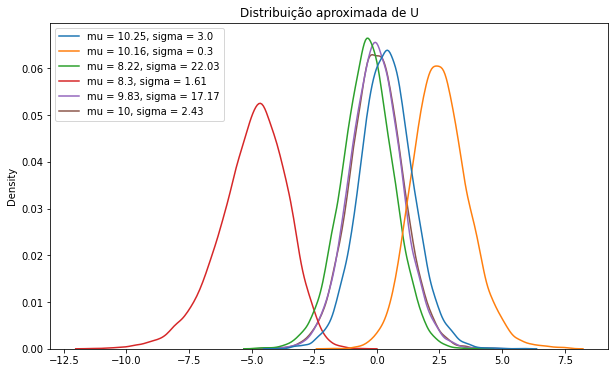

In [12]:
fig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(data = U_values, ax = ax)
ax.set_title('Distribuição aproximada de U')
plt.show()

### Teorema 

Seja $c$ o $1 - \alpha_0$ quartil da distribuição $t$ com $n-1$ graus de liberdade. Então, segundo o teste citado acima, a função poder tem as seguintes propriedades: 

1. $\pi(\mu, \sigma|\delta) = \alpha_0$, quando $\mu = \mu_0$.
2. $\pi(\mu, \sigma|\delta) < \alpha_0$, quando $\mu < \mu_0$.
3. $\pi(\mu, \sigma|\delta) > \alpha_0$, quando $\mu > \mu_0$.
4. $\pi(\mu, \sigma|\delta) \to 0$, quando $\mu \to -\infty$.
5. $\pi(\mu, \sigma|\delta) \to 1$, quando $\mu \to \infty$.

O teste também é não enviesado como consequência.

### P-valores para testes t

Seja $u$ a estatística $U$ quando observada. Seja $T_{n-1}(\cdot)$ a cdf da distribuição t com $n-1$ graus de liberdade. Então o p-valor para $H_0: \mu \leq \mu_0$ é $1 - T_{n-1}(u)$, enquanto o p-valor para $H_0: \mu \ge \mu_0$ é $T_{n-1}(u)$. 

### Distribuição t não central 

O objetivo é encontrar a distribuição de $U$ mesmo quando $\mu \neq \mu_0$. 

### Teorema  (Função Poder)